In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# **Abstract**

In this notebook we use neural networks for character classification on the TMNIST dataset. We preprocessed the data by normalizing it and splitting it into training and testing sets. Then we built a sequential neural network model with multiple hidden layers and trained it on the training set

# **Input Data**

Import TMNIST alphabets from dataset and drop names column

In [2]:
data = pd.read_csv("../input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")
data = data.drop("names", axis=1)
data.head()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Importing Tensorflow Libraries for Neural Networks**

Install required neural network libraries form tensorflow

In [3]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
label_encoder = LabelEncoder()

2024-04-09 23:44:00.601759: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 23:44:00.601915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 23:44:00.753987: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Pre-processing**

We perform data normalization using MinMaxScaler and label encoding with LabelEncoder. Subsequently, we split the dataset into training and testing sets, reserving 20% for testing purposes. This split allows for effective model performance evaluation. Finally, we print the shape of the testing set to gain insights into its dimensions.

In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X = data.iloc[:, 1:].values.astype('float32')
X_scaled = scaler.fit_transform(X)
y = label_encoder.fit_transform(data.iloc[:, 0])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_test.shape

(54819, 784)

# **Neural network model architecture**

We define the model architecture by creating a Sequential model object. It consists of three dense layers with 256, 128, and 94 units, respectively. ReLU activation functions are applied to the hidden layers, while the output layer utilizes a softmax activation function to generate class probabilities. Dropout layers with a dropout rate of 0.2 are incorporated after each hidden layer to mitigate overfitting.

After defining the model architecture, we compile the model using the sparse categorical cross-entropy loss function, 'adam' optimizer, and 'accuracy' metric. This compilation step configures the model for training by specifying the loss function to minimize, the optimizer algorithm to use for gradient descent, and the evaluation metric to monitor during training.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(94, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Training the Neural Network model**
This code trains the previously defined neural network model on a training set using the fit() method.

The X_train and y_train variables represent the training set data and labels, respectively. The epochs parameter specifies the number of times the model will iterate through the entire training set during training. The batch_size parameter determines the number of samples processed at a time during each epoch.

The validation_split parameter specifies the portion of the training set to use for validation, which is used to monitor the model's performance on data it hasn't seen before. The fit() method returns a history object that contains information about the model's training history, which can be used to visualize the model's performance over time.

In [6]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6074 - loss: 1.5988 - val_accuracy: 0.8462 - val_loss: 0.5254
Epoch 2/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8276 - loss: 0.5821 - val_accuracy: 0.8584 - val_loss: 0.4510
Epoch 3/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8474 - loss: 0.4952 - val_accuracy: 0.8689 - val_loss: 0.4139
Epoch 4/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8608 - loss: 0.4454 - val_accuracy: 0.8706 - val_loss: 0.3957
Epoch 5/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8622 - loss: 0.4259 - val_accuracy: 0.8771 - val_loss: 0.3788
Epoch 6/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8682 - loss: 0.3987 - val_accuracy: 0.8832 - val_loss: 0.3627
Epoch 7/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8760 - loss: 0.3783 - val_accuracy: 0.8869 - val_loss: 0.3565
Epoch 8/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8771 - loss: 0

# **Accuracy**

The trained neural network model is evaluated on the test dataset using the evaluate() method. The test accuracy, represented as a percentage, is printed out, providing a clear indication of the model's performance on unseen data. This evaluation step serves as a pivotal validation of the model's effectiveness in real-world scenarios.


In [7]:
# Train the model
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:.2f}%'.format(test_acc * 100), test_acc)

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9039 - loss: 0.3191
Test accuracy: 90.41% 0.9041025638580322


# **Visualization**

The provided code snippet presents functions for plotting the training and validation accuracy, as well as the training and validation loss, over multiple epochs. Utilizing Matplotlib, the accuracy and loss metrics are visualized to monitor the model's performance during training. The first plot displays the training and validation accuracy, while the second plot illustrates the training and validation loss. These visualizations offer insights into the model's learning dynamics, aiding in the interpretation of its training process and facilitating adjustments to enhance performance.

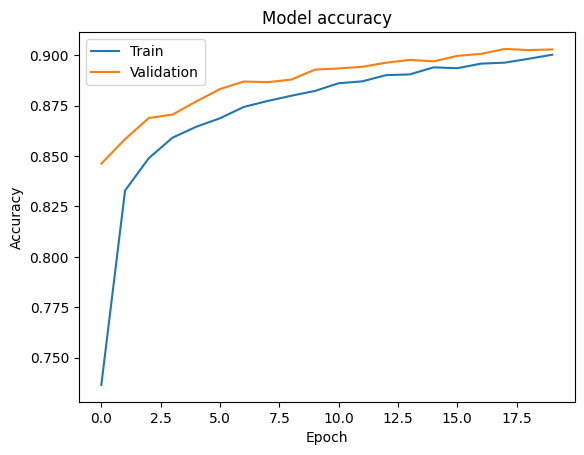

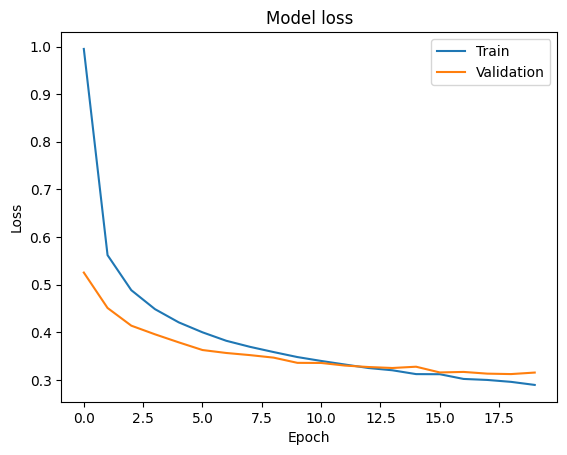

In [8]:
# Function for Plotting
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# **Conclusion**

In conclusion, we have successfully built a neural network model for character recognition using the TMNIST dataset. We achieved an accuracy of over 90% . The model can be further improved by tuning hyperparameters, adding more layers, and increasing the number of training epochs. Overall, this project demonstrates the effectiveness of neural networks in solving image classification problems.

# **References**

Multiple methods and tenchniques have been adopted for this notebook. All the references are mentioned below:

* Installing pandas packages, reading, analyzing identifying the data types and observing null values have been adapted from Pandas documentation
* To implement Neural Networks - [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
* To implement the architecture , [I have referred to Neural Networks](https://www.kaggle.com/code/sanalpillai/tmnist-alphabet-character-recognition-acc-94-86) Notebook

# **License**

MIT License

Copyright (c) 2024 Vinay Chelpuri

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.